# Data Exploration

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df_features = pd.read_csv('Data/Training_features.csv', index_col = 'respondent_id')
df_values = pd.read_csv('Data/Training_labels.csv', index_col = 'respondent_id')

In [3]:
df = df_features.join(df_values)

In [4]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

### Target Distribution

In [6]:
df_values.h1n1_vaccine.value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [7]:
df_values.seasonal_vaccine.value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

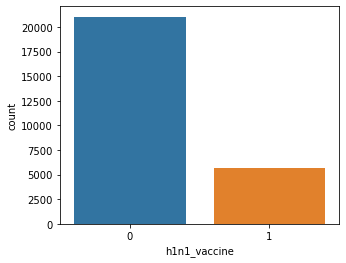

In [8]:
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.countplot(x=df.h1n1_vaccine)

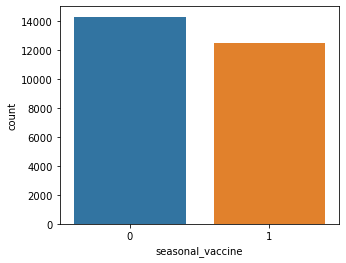

In [9]:
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.countplot(x=df.seasonal_vaccine)

### Vaccine Correlation

In [10]:
df.h1n1_vaccine.corr(df.seasonal_vaccine)

0.37714265306144495

### Categorical Columns

In [11]:
cat_cols = list(df_features.select_dtypes(include='object').columns)

for col in cat_cols:
    print(f'There are {df[col].nunique()} values of the {col} feature')
    print(f'The values are {df[col].unique()}')
    print('----------------------------------')

There are 5 values of the age_group feature
The values are ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
----------------------------------
There are 4 values of the education feature
The values are ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
----------------------------------
There are 4 values of the race feature
The values are ['White' 'Black' 'Other or Multiple' 'Hispanic']
----------------------------------
There are 2 values of the sex feature
The values are ['Female' 'Male']
----------------------------------
There are 3 values of the income_poverty feature
The values are ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
----------------------------------
There are 2 values of the marital_status feature
The values are ['Not Married' 'Married' nan]
----------------------------------
There are 2 values of the rent_or_own feature
The values are ['Own' 'Rent' nan]
----------------------------------
There are 3 values o

### Numerical Columns

In [12]:
num_cols = list(df_features.select_dtypes(include=['float64', 'int64']).columns)
for col in num_cols:
    print(f'There are {df[col].nunique()} values of the {col} feature')
    print(f'The values are {df[col].unique()}')
    print('----------------------------------')

There are 4 values of the h1n1_concern feature
The values are [ 1.  3.  2.  0. nan]
----------------------------------
There are 3 values of the h1n1_knowledge feature
The values are [ 0.  2.  1. nan]
----------------------------------
There are 2 values of the behavioral_antiviral_meds feature
The values are [ 0.  1. nan]
----------------------------------
There are 2 values of the behavioral_avoidance feature
The values are [ 0.  1. nan]
----------------------------------
There are 2 values of the behavioral_face_mask feature
The values are [ 0.  1. nan]
----------------------------------
There are 2 values of the behavioral_wash_hands feature
The values are [ 0.  1. nan]
----------------------------------
There are 2 values of the behavioral_large_gatherings feature
The values are [ 0.  1. nan]
----------------------------------
There are 2 values of the behavioral_outside_home feature
The values are [ 1.  0. nan]
----------------------------------
There are 2 values of the behavior

### Correlations

#### h1n1 Vaccine

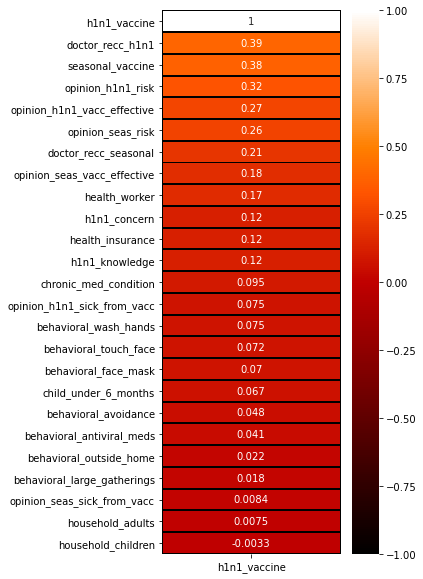

In [13]:
fig, ax = plt.subplots(figsize=(4,10))
sns.heatmap(df.corr()[['h1n1_vaccine']].sort_values(by='h1n1_vaccine', ascending=False),
           vmin=-1, vmax=1, linewidths=1, linecolor='black', annot=True, cmap="gist_heat");

#### Seasonal Vaccine

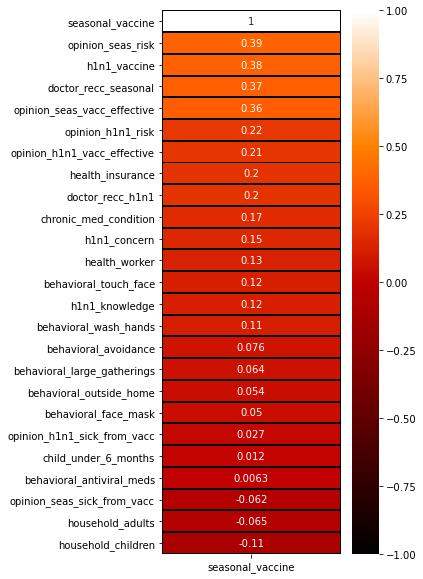

In [14]:
fig, ax = plt.subplots(figsize=(4,10))
sns.heatmap(df.corr()[['seasonal_vaccine']].sort_values(by='seasonal_vaccine', ascending=False),
           vmin=-1, vmax=1, linewidths=1, linecolor='black', annot=True, cmap="gist_heat");

### Train Test Split

In [15]:
X = df_features
y = df_values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [31]:
X_train.to_csv('Data/X_train.csv')
X_test.to_csv('Data/X_test.csv')
y_train.to_csv('Data/y_train.csv')
y_test.to_csv('Data/y_test.csv')

### Baseline Model

In [16]:
baseline_model = DummyClassifier(strategy='stratified', random_state=42)
baseline_model.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [17]:
preds = baseline_model.predict_proba(X_test)

In [18]:
baseline_preds_df = pd.DataFrame({'h1n1_vaccine' : preds[0][:, 1], 'seasonal_vaccine' : preds[1][:,1]}, 
                                 index=X_test.index)
baseline_preds_df

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
3780,0.0,0.0
6856,1.0,1.0
10173,0.0,0.0
7285,0.0,1.0
9874,0.0,0.0
...,...,...
10918,0.0,0.0
10169,0.0,1.0
14158,0.0,0.0


In [28]:
def plot_roc(y_true, y_pred, label, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    ax.plot(fpr, tpr)
    ax.plot([0,1], [0,1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(f'{label}: AUC = {roc_auc_score(y_true, y_pred):.4f}')

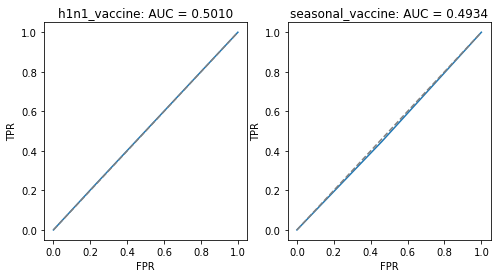

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

plot_roc(y_test.h1n1_vaccine, baseline_preds_df.h1n1_vaccine, 'h1n1_vaccine', ax[0])
plot_roc(y_test.seasonal_vaccine, baseline_preds_df.seasonal_vaccine, 'seasonal_vaccine', ax[1])

In [21]:
roc_auc_score(y_test, baseline_preds_df)

0.4972259942405946